In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [5]:
# Machine Learning Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
#r has been added as it doesnt allow "\" in the path
df = pd.read_csv(r"C:\Users\Dell\Desktop\ML project\data_set\diabetes.csv")

### Data Cleaning and Data Processwing is taking place

In [7]:
# Display first 5 rows to display more rows we can add the number of rows in the head() function
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [69]:
# Checking for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [70]:
#Check for Duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [9]:
# Statistic of each columns
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

C:\Users\Dell\AppData\Local\Temp\ipykernel_7832\649224250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='coolwarm')


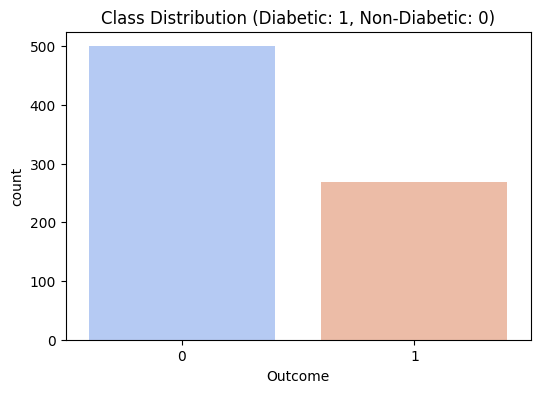

In [10]:
# Data Visualization - Count Plot of Outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='coolwarm')
plt.title("Class Distribution (Diabetic: 1, Non-Diabetic: 0)")
plt.show()

In [11]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = df[(df['Outcome']==0)]
df_minority = df[(df['Outcome']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,n_samples= 500,random_state=0)
# Combine majority class with upsampled minority class
df2 = pd.concat([df_minority_upsampled, df_majority])

C:\Users\Dell\AppData\Local\Temp\ipykernel_7832\2924484755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df2, palette='coolwarm')


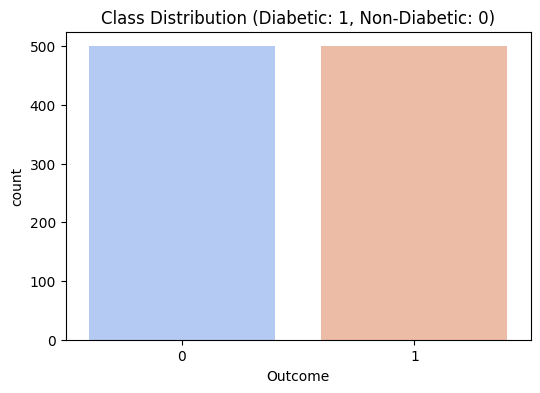

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df2, palette='coolwarm')
plt.title("Class Distribution (Diabetic: 1, Non-Diabetic: 0)")
plt.show()

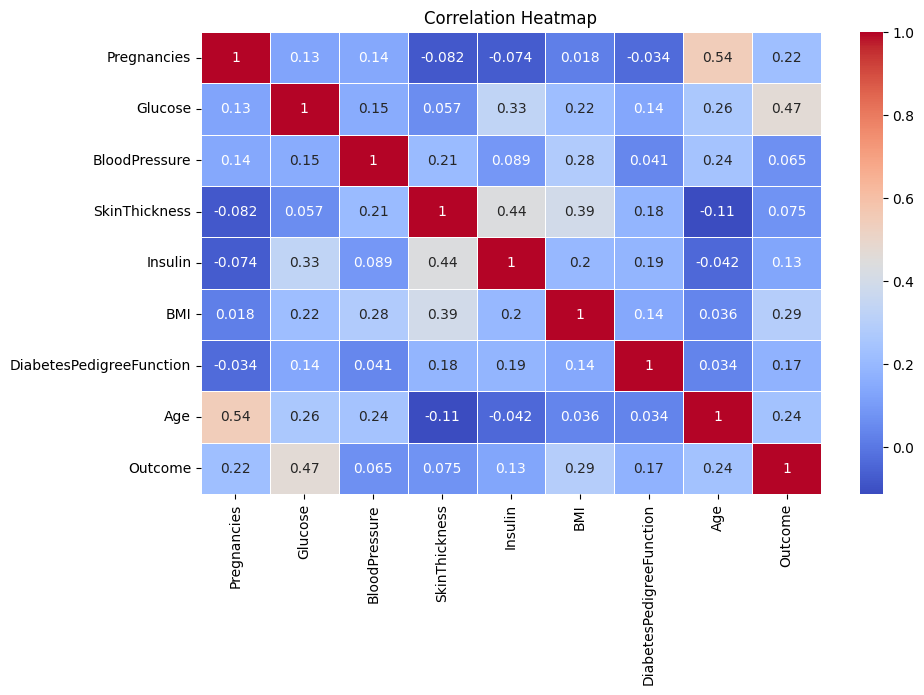

In [13]:
# 4️⃣ Heatmap to show correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1000x600 with 0 Axes>

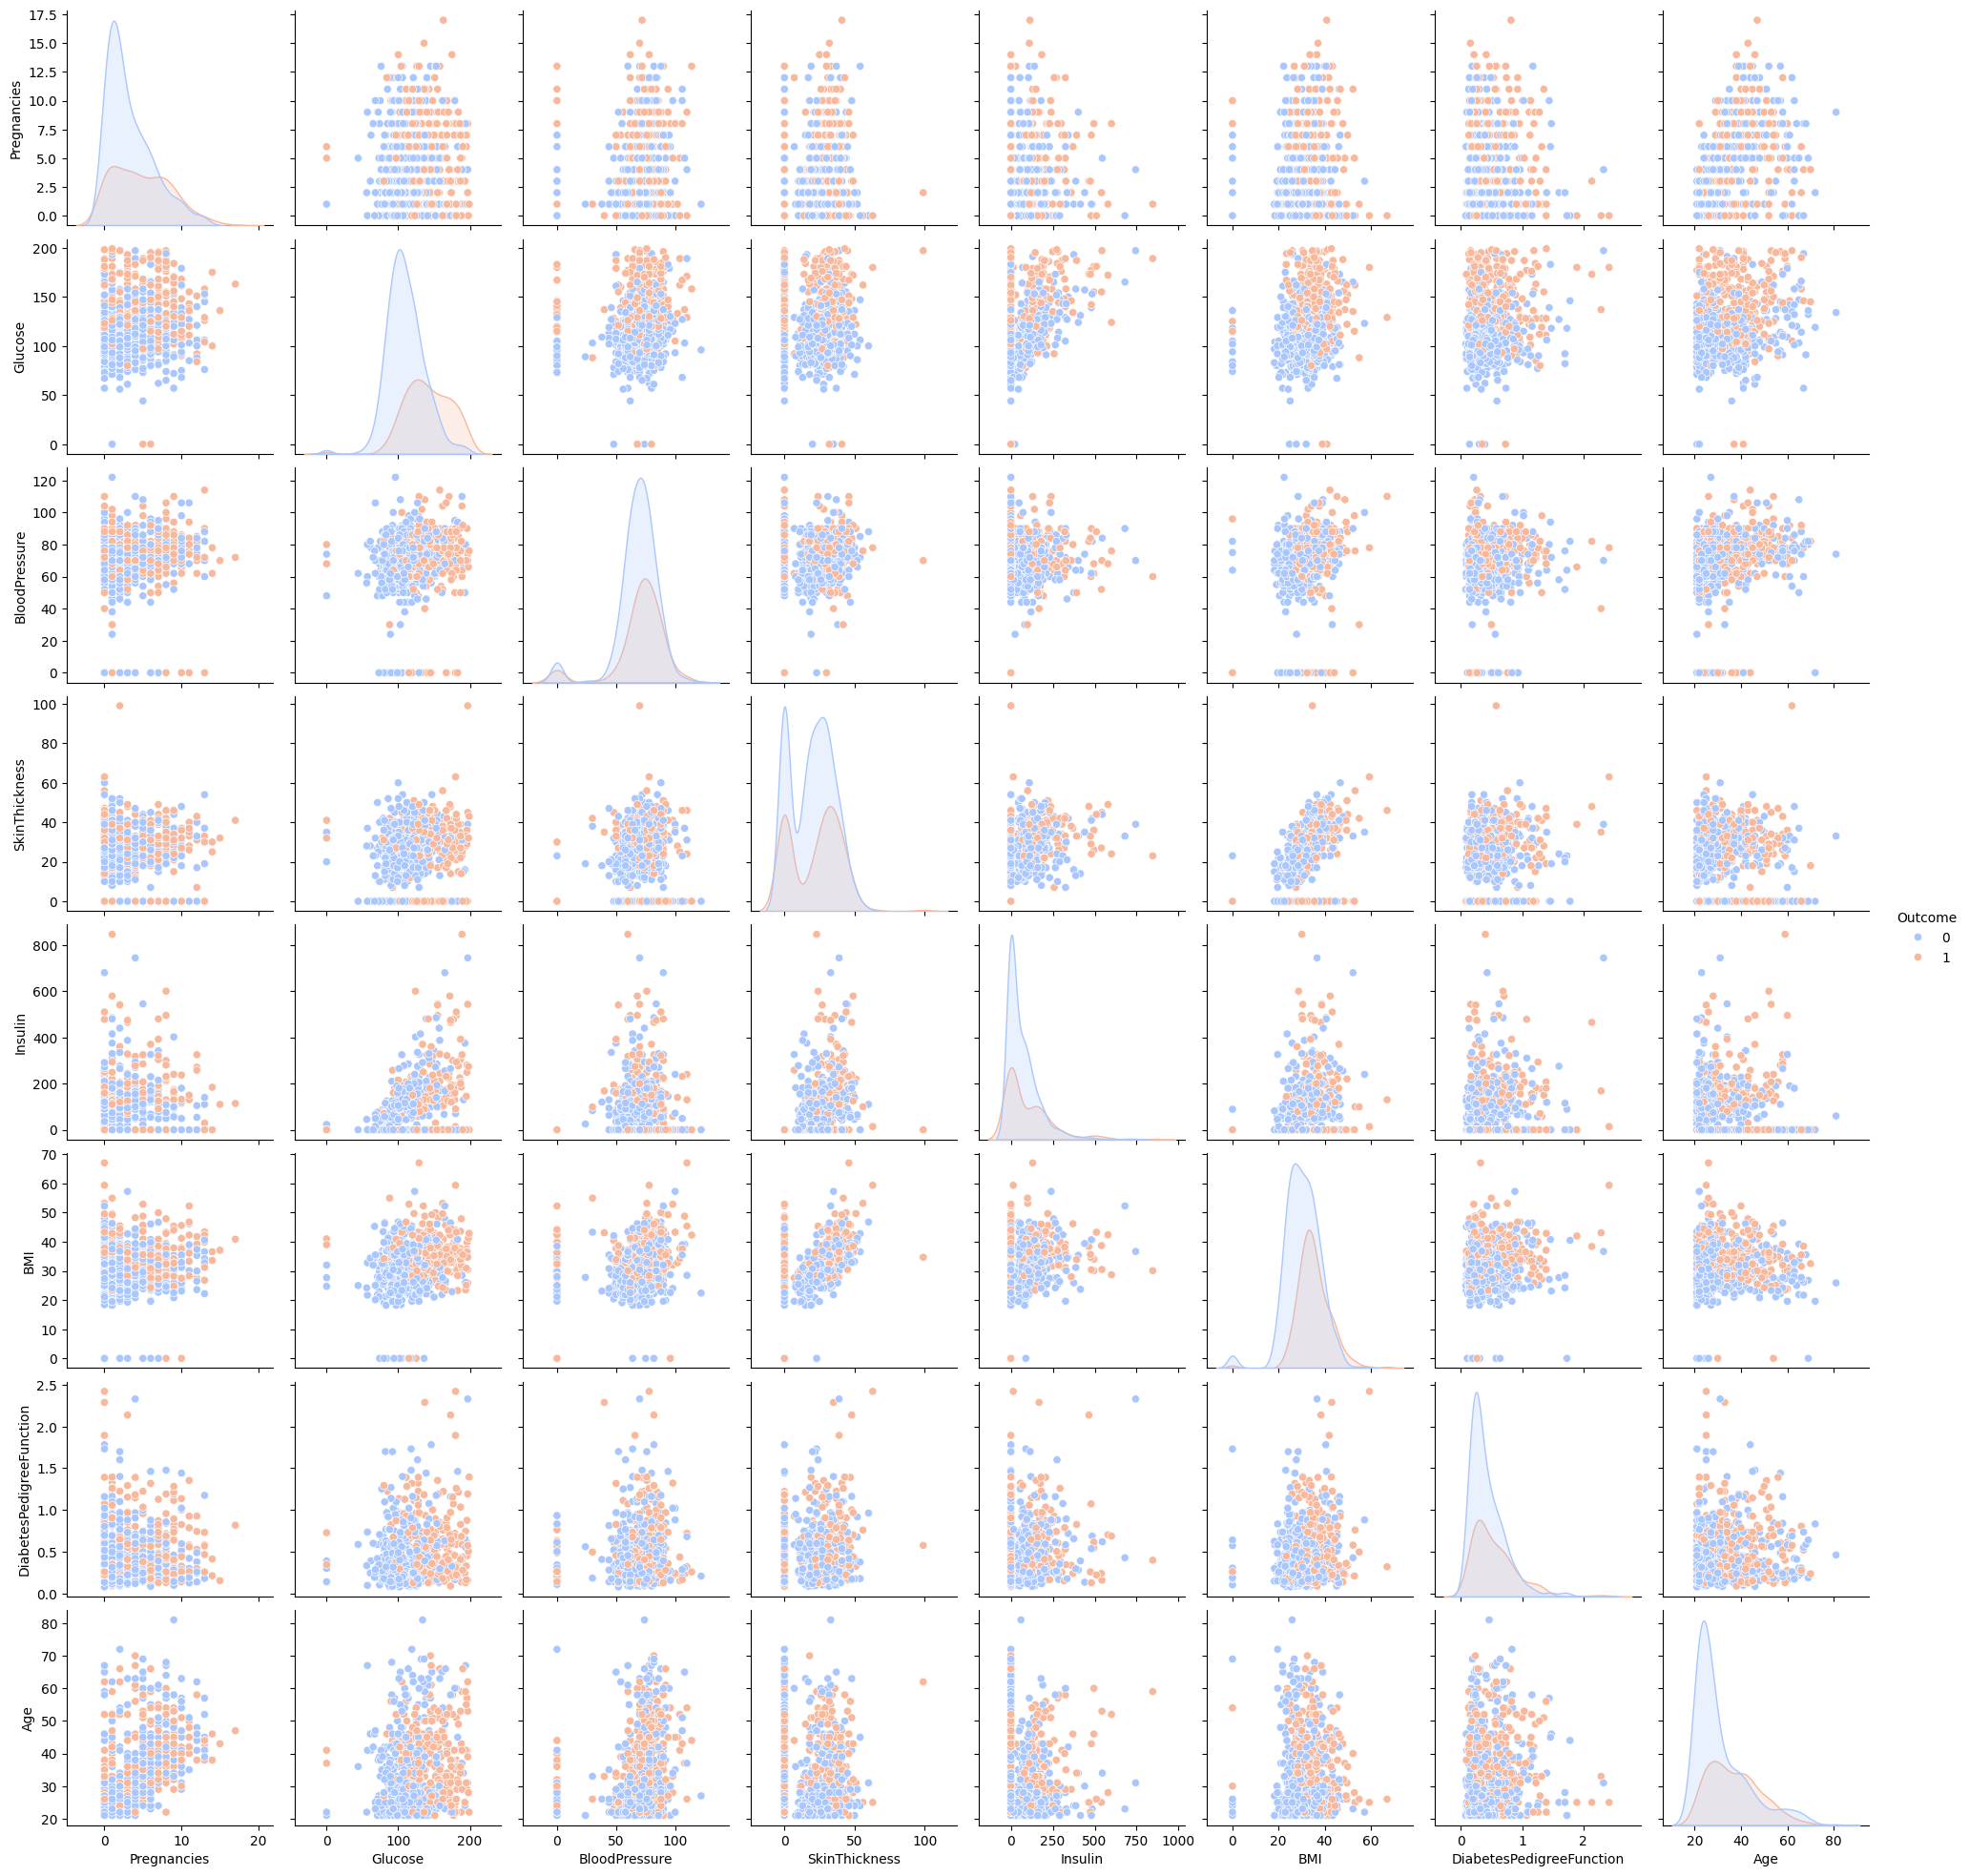

In [14]:
### Blue denotes non -diabetic while red denotes diabetic
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue="Outcome", palette='coolwarm')
plt.show()

### DATA PREPROCESSING

In [15]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [16]:
# Define features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [22]:
# Install imbalanced-learn package
#%pip install imbalanced-learn
# Apply SMOTE to balance dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [23]:
# Convert to DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Outcome'] = y_resampled

C:\Users\Dell\AppData\Local\Temp\ipykernel_7832\1945790958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='coolwarm')


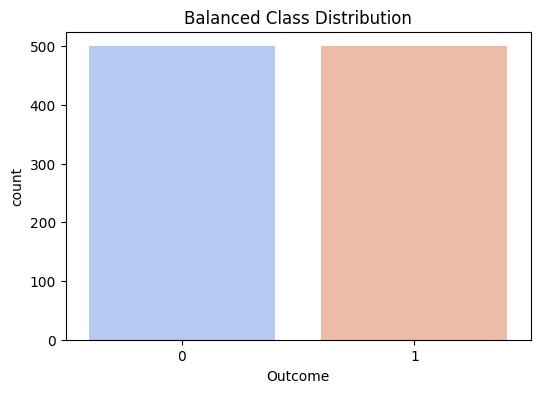

In [24]:
# Check new class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette='coolwarm')
plt.title("Balanced Class Distribution")
plt.show()

In [25]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [26]:
# Standardize features (only for models that need it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training Model

In [27]:
# Dictionary to store model results
model_results = {}

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to store model results
model_results = {}

# Helper function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)  # Get predicted probabilities
    y_pred = (y_pred > 0.5).astype("int32").flatten()  # Convert probabilities to binary (0 or 1)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    model_results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}

    # Print scores
    print(f"\n📌 {name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    


📌 Logistic Regression Performance:
Accuracy: 0.7550
Precision: 0.7500
Recall: 0.7723
F1 Score: 0.7610


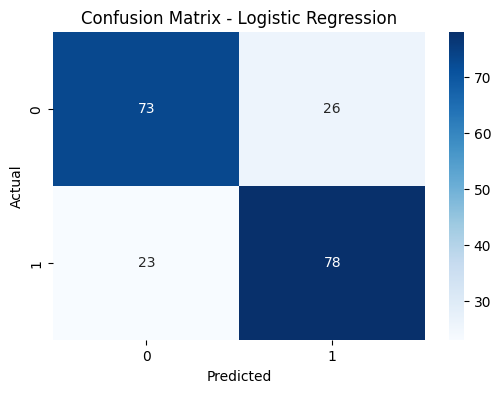

In [ ]:
# 1️ Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
evaluate_model('Logistic Regression', log_reg, X_test_scaled, y_test)


📌 Decision Tree Performance:
Accuracy: 0.7300
Precision: 0.7156
Recall: 0.7723
F1 Score: 0.7429


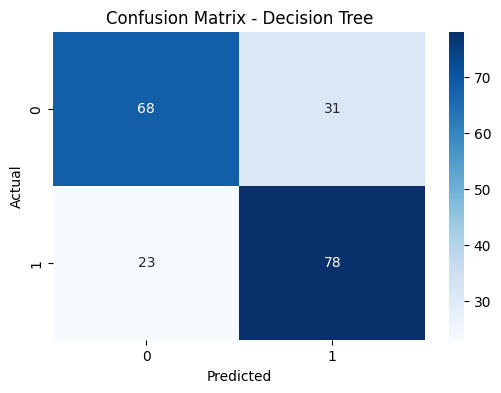

In [ ]:
# 2️ Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
evaluate_model('Decision Tree', tree, X_test, y_test)


📌 SVM Performance:
Accuracy: 0.7500
Precision: 0.7525
Recall: 0.7525
F1 Score: 0.7525


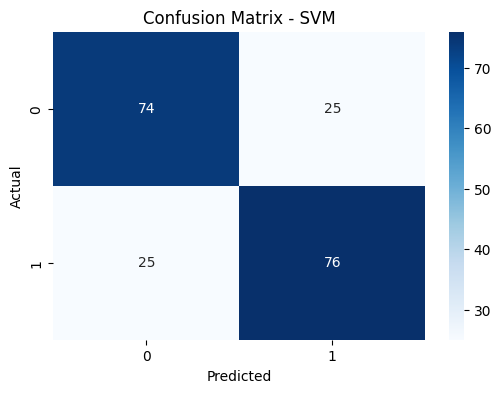

In [44]:
# 3️ Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
evaluate_model('SVM', svm, X_test_scaled, y_test)


📌 Naive Bayes Performance:
Accuracy: 0.7700
Precision: 0.7835
Recall: 0.7525
F1 Score: 0.7677


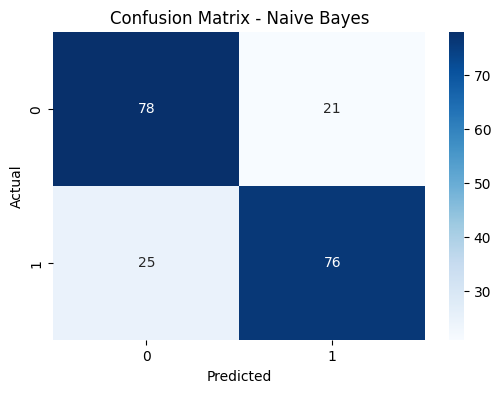

In [45]:
# 4️ Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
evaluate_model('Naive Bayes', nb, X_test_scaled, y_test)


📌 Gradient Boosting Performance:
Accuracy: 0.7900
Precision: 0.7706
Recall: 0.8317
F1 Score: 0.8000


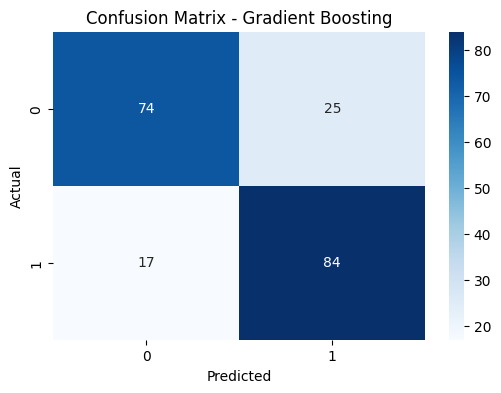

In [59]:
# 5️ Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
evaluate_model('Gradient Boosting', gb, X_test, y_test)

c:\Users\Dell\Desktop\ML project\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

📌 ANN Performance:
Accuracy: 0.7650
Precision: 0.7455
Recall: 0.8119
F1 Score: 0.7773


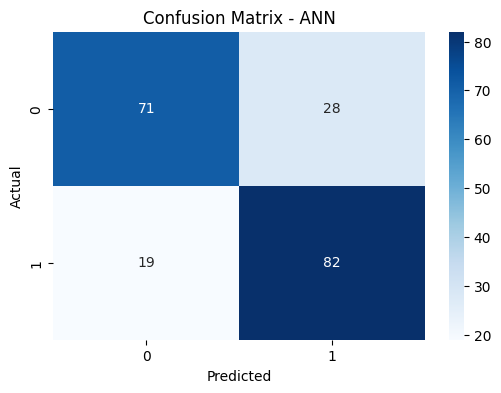

In [58]:
# 6️ Artificial Neural Network (ANN)
ann = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=0)
ann_pred = (ann.predict(X_test_scaled) > 0.5).astype("int32").flatten()
evaluate_model('ANN', ann, X_test_scaled, y_test)

### HYPERPARAMETER TUNING


✅ Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 5}

📌 Optimized Decision Tree Performance:
Accuracy: 0.7700
Precision: 0.7957
Recall: 0.7327
F1 Score: 0.7629


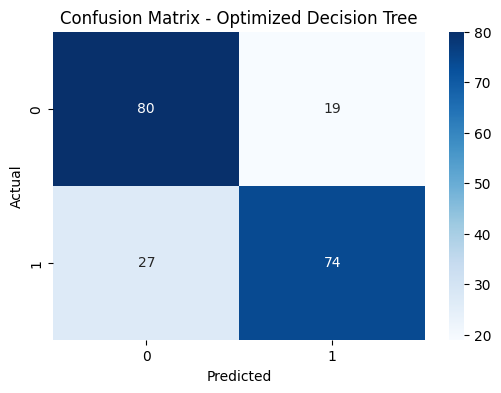

In [64]:
# Define the hyperparameter grid for the Decision Tree model
# max_depth: Defines how deep the tree can grow (trying values 3, 5, and 10)
# min_samples_split: Minimum number of samples required to split a node (trying values 2, 5, and 10)
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}

# Initialize GridSearchCV
# - DecisionTreeClassifier(): Base model to optimize
# - param_grid: Dictionary of hyperparameters to try
# - cv=5: Uses 5-fold cross-validation to ensure better generalization
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit the model on training data
# This trains multiple models with different hyperparameter combinations
grid_tree.fit(X_train, y_train)
#If max_depth=3 is chosen, it means that deeper trees did not provide better accuracy on validation data.
print("\n✅ Best Parameters for Decision Tree:", grid_tree.best_params_)
best_tree = grid_tree.best_estimator_
evaluate_model('Optimized Decision Tree', best_tree, X_test, y_test)


### FINAL COMPARISON OF MODELS

In [65]:
# Convert model results to DataFrame
results_df = pd.DataFrame(model_results).T
#.T means transpose

In [66]:
# Print Model Performance Table
print("\n📊 Model Performance Summary:")
print(results_df)


📊 Model Performance Summary:
                         Accuracy  Precision    Recall  F1 Score
ANN                         0.765   0.745455  0.811881  0.777251
Gradient Boosting           0.790   0.770642  0.831683  0.800000
Optimized Decision Tree     0.770   0.795699  0.732673  0.762887


C:\Users\Dell\AppData\Local\Temp\ipykernel_7832\726310699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x=results_df.index, y="Accuracy", palette="coolwarm")


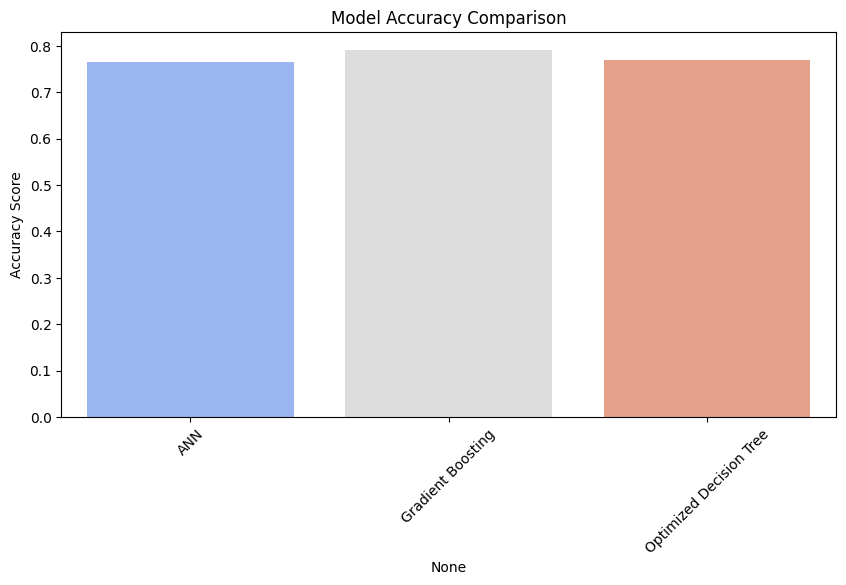

In [67]:
# Bar plot to compare model accuracy
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x=results_df.index, y="Accuracy", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()

In [68]:
# Select the best model based on F1-score
best_model = results_df['F1 Score'].idxmax()
print(f"\n🏆 Best Model: {best_model} with F1 Score = {results_df.loc[best_model, 'F1 Score']:.4f}")


🏆 Best Model: Gradient Boosting with F1 Score = 0.8000


In [76]:
import joblib
#Saving the best_model so that it can be used as backend
# Assuming logistic regression is your best model
joblib.dump(gb, 'diabetes_model.pkl')  
print("Model saved as 'diabetes_model.pkl'")


Model saved as 'diabetes_model.pkl'


In [77]:
import os
print(os.listdir())  # Check if 'diabetes_model.pkl' is there

['diabetes.ipynb', 'diabetes_model.pkl', 'test.ipynb']


In [75]:
import joblib
import numpy as np

# Load the saved model
best_model_name = joblib.load("diabetes_model.pkl")

# Map the model name to the actual model object
model_mapping = {
	'Logistic Regression': log_reg,
	'Decision Tree': tree,
	'SVM': svm,
	'Naive Bayes': nb,
	'Gradient Boosting': gb,
	'ANN': ann,
	'Optimized Decision Tree': best_tree
}

# Get the actual model object
model = model_mapping[best_model_name]

# Example test input (Replace with real values)
test_input = np.array([[2, 148, 72, 35, 0, 33.6, 0.627, 50]])  # Adjust as per dataset columns

# Make a prediction
prediction = model.predict(test_input)
print("Test Prediction:", prediction)  # Should print 0 or 1

Test Prediction: [1]


c:\Users\Dell\Desktop\ML project\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
